## diabetes_data_upload_16_40.csv dataset exploration, analysis and model comparision

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import seaborn as sns
import matplotlib as plt

In [2]:
df = pd.read_csv('useful/diabetes_data_upload_16_40.csv')

In [3]:
df.head()

,Age,Gender,Frequent_Urination,Frequent_Thirst,Sudden_Weight_Loss,Weakness,Excessive_Eating,Visual_Blurring,Itching,Irritability,Delayed_Healing,Partial_Paresis,Muscle_Stiffness,Alopecia,Obesity,Class
0,40,Male,No,Yes,No,Yes,No,No,Yes,No,Yes,No,Yes,Yes,Yes,1
1,38,Male,Yes,Yes,No,No,Yes,No,Yes,No,Yes,No,Yes,No,No,1
2,35,Male,Yes,No,No,No,Yes,No,No,Yes,Yes,No,No,Yes,No,1
3,39,Male,Yes,No,Yes,No,No,No,Yes,Yes,No,No,No,Yes,No,1
4,32,Male,No,No,No,No,No,No,No,Yes,Yes,No,No,No,Yes,1


<AxesSubplot:>

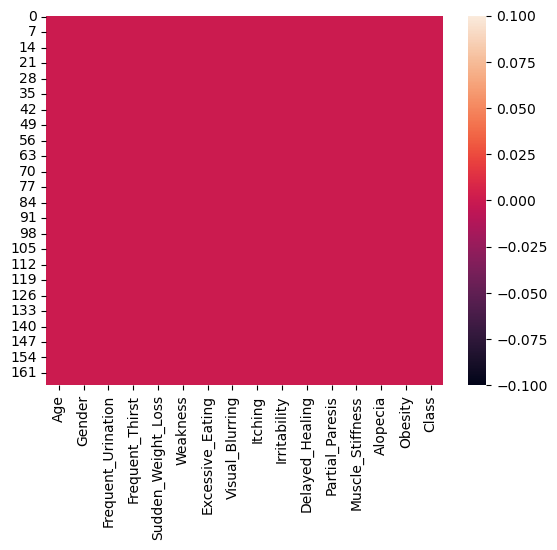

In [4]:
sns.heatmap(df.isnull())

In [5]:
df['Class'].value_counts()

1    98
0    69
Name: Class, dtype: int64

In [6]:
df.dtypes

Age                    int64
Gender                object
Frequent_Urination    object
Frequent_Thirst       object
Sudden_Weight_Loss    object
Weakness              object
Excessive_Eating      object
Visual_Blurring       object
Itching               object
Irritability          object
Delayed_Healing       object
Partial_Paresis       object
Muscle_Stiffness      object
Alopecia              object
Obesity               object
Class                  int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 167 non-null    int64 
 1   Gender              167 non-null    object
 2   Frequent_Urination  167 non-null    object
 3   Frequent_Thirst     167 non-null    object
 4   Sudden_Weight_Loss  167 non-null    object
 5   Weakness            167 non-null    object
 6   Excessive_Eating    167 non-null    object
 7   Visual_Blurring     167 non-null    object
 8   Itching             167 non-null    object
 9   Irritability        167 non-null    object
 10  Delayed_Healing     167 non-null    object
 11  Partial_Paresis     167 non-null    object
 12  Muscle_Stiffness    167 non-null    object
 13  Alopecia            167 non-null    object
 14  Obesity             167 non-null    object
 15  Class               167 non-null    int64 
dtypes: int64(2), object(14)
me

In [8]:
df.describe(include='all')

,Age,Gender,Frequent_Urination,Frequent_Thirst,Sudden_Weight_Loss,Weakness,Excessive_Eating,Visual_Blurring,Itching,Irritability,Delayed_Healing,Partial_Paresis,Muscle_Stiffness,Alopecia,Obesity,Class
count,167.000000,167,167,167,167,167,167,167,167,167,167,167,167,167,167,167.000000
unique,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,2,NaN
top,NaN,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,NaN
freq,NaN,93,96,100,104,97,123,124,116,140,116,111,122,147,150,NaN
mean,34.724551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.586826
std,4.209377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.493884
min,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
75%,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


In [9]:
df.duplicated().sum()

89

In [10]:
df.duplicated().head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [11]:
import matplotlib.pyplot as plt
def bar_plot(variable):
    """
     input: variable
     output: barplot & value count
     """
    var = df[variable]
    
    varValue = var.value_counts()
    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel('Frequency')
    plt.title(variable)
    plt.show()
    
    print("{}\n{}".format(variable, varValue))

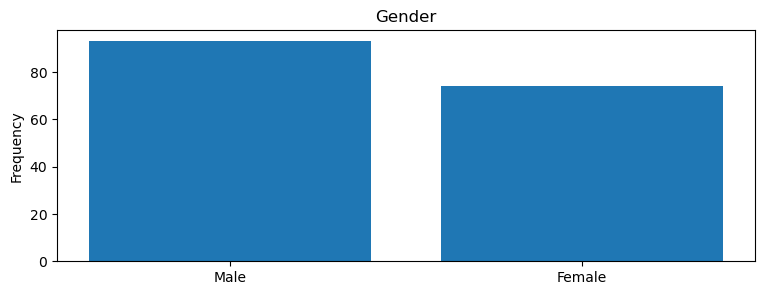

Gender
Male      93
Female    74
Name: Gender, dtype: int64


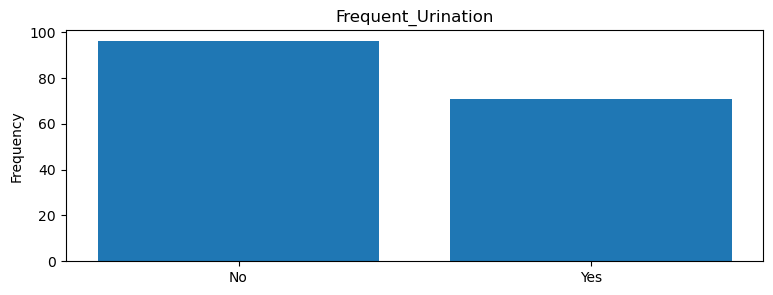

Frequent_Urination
No     96
Yes    71
Name: Frequent_Urination, dtype: int64


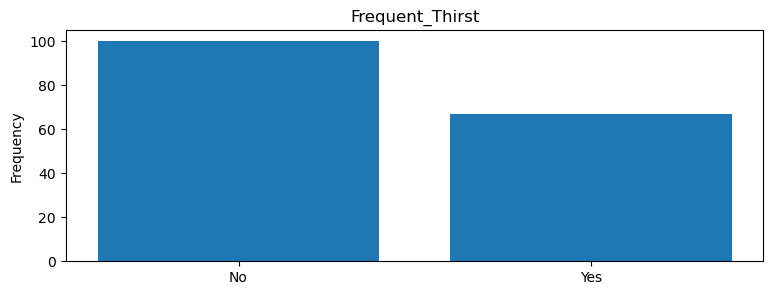

Frequent_Thirst
No     100
Yes     67
Name: Frequent_Thirst, dtype: int64


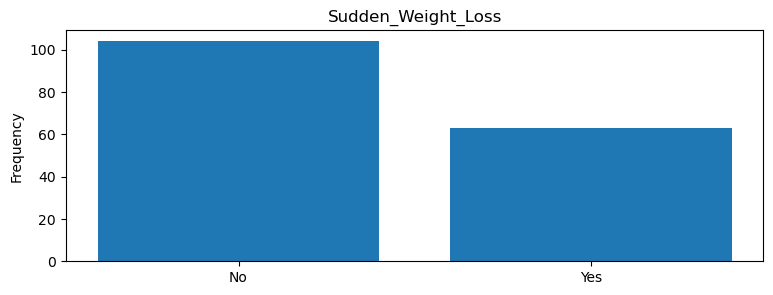

Sudden_Weight_Loss
No     104
Yes     63
Name: Sudden_Weight_Loss, dtype: int64


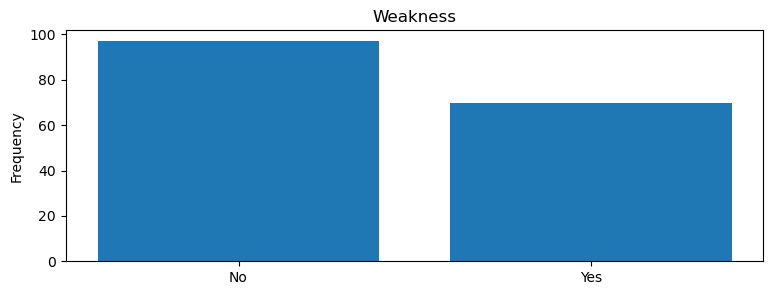

Weakness
No     97
Yes    70
Name: Weakness, dtype: int64


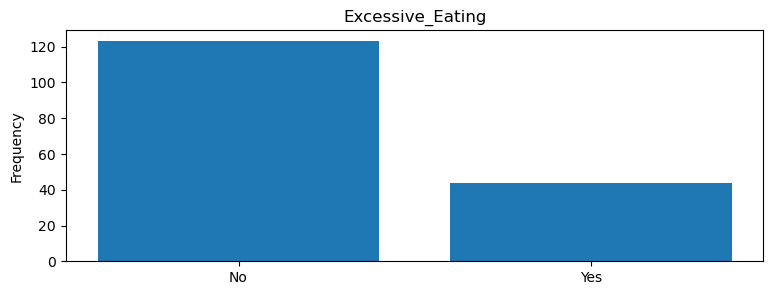

Excessive_Eating
No     123
Yes     44
Name: Excessive_Eating, dtype: int64


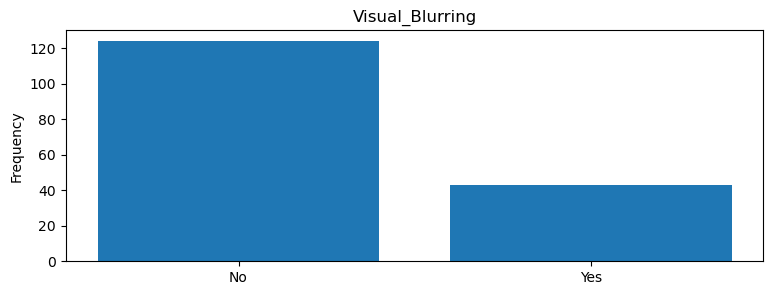

Visual_Blurring
No     124
Yes     43
Name: Visual_Blurring, dtype: int64


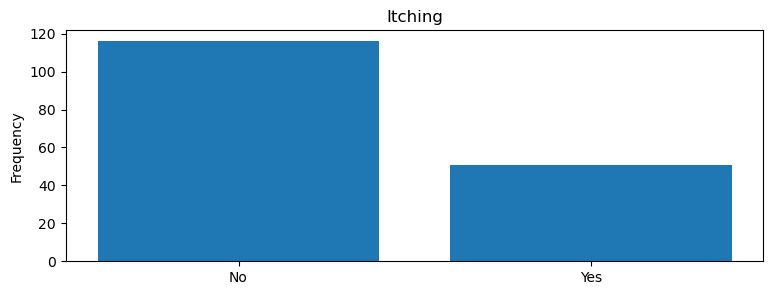

Itching
No     116
Yes     51
Name: Itching, dtype: int64


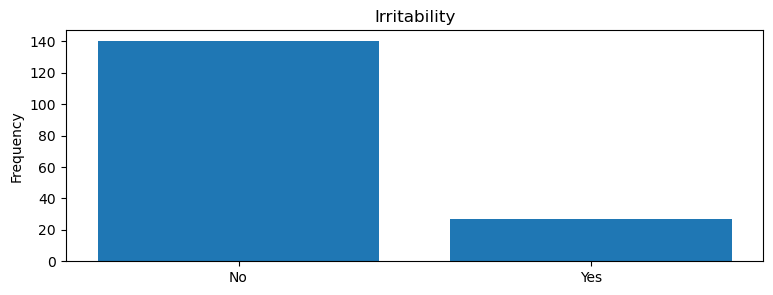

Irritability
No     140
Yes     27
Name: Irritability, dtype: int64


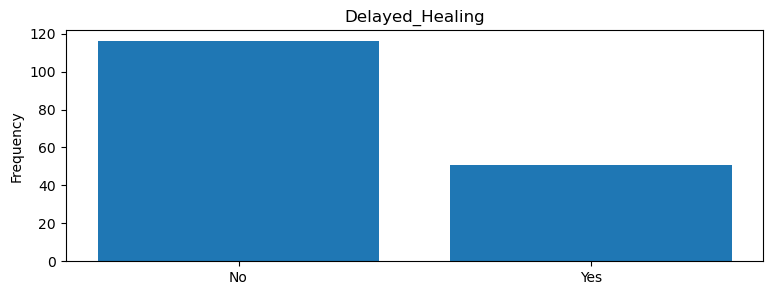

Delayed_Healing
No     116
Yes     51
Name: Delayed_Healing, dtype: int64


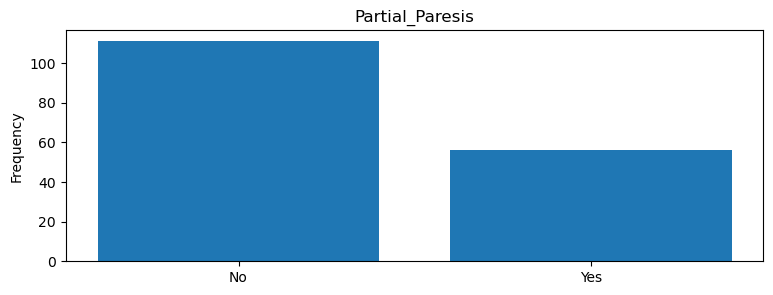

Partial_Paresis
No     111
Yes     56
Name: Partial_Paresis, dtype: int64


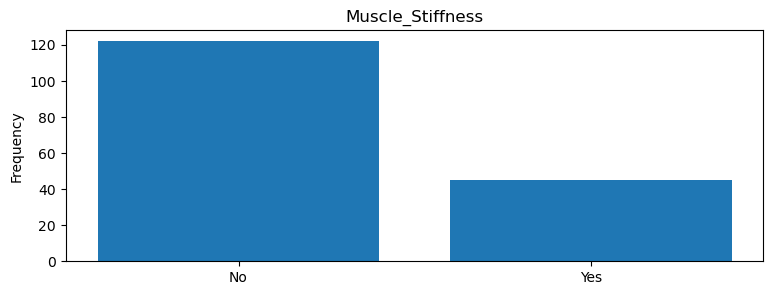

Muscle_Stiffness
No     122
Yes     45
Name: Muscle_Stiffness, dtype: int64


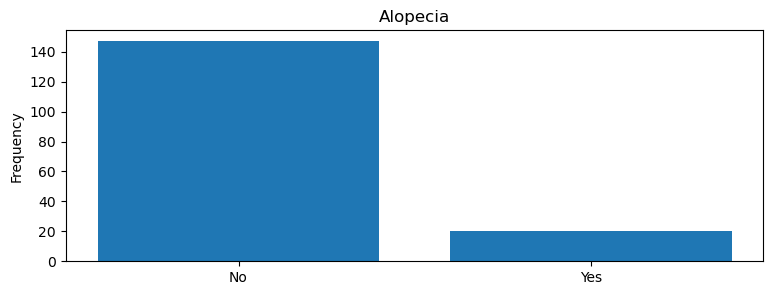

Alopecia
No     147
Yes     20
Name: Alopecia, dtype: int64


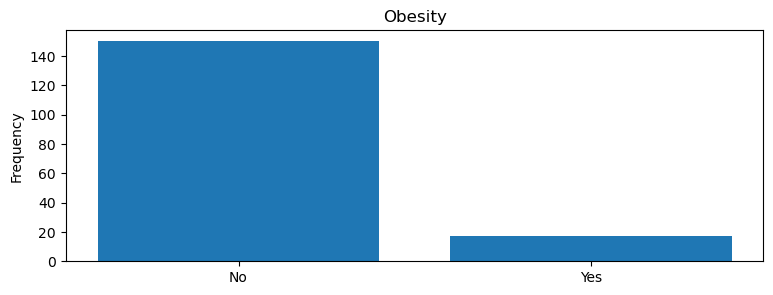

Obesity
No     150
Yes     17
Name: Obesity, dtype: int64


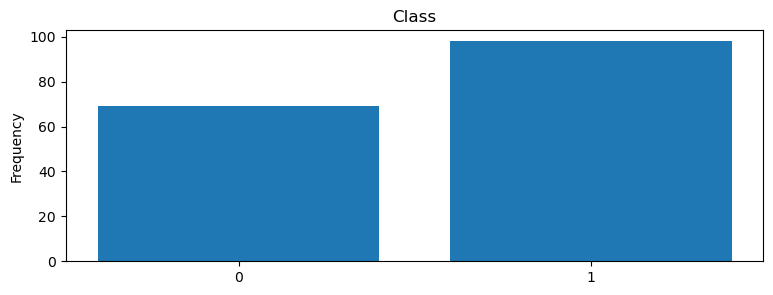

Class
1    98
0    69
Name: Class, dtype: int64


In [12]:
categorical =['Gender','Frequent_Urination','Frequent_Thirst','Sudden_Weight_Loss','Weakness','Excessive_Eating','Visual_Blurring','Itching','Irritability','Delayed_Healing','Partial_Paresis','Muscle_Stiffness','Alopecia','Obesity','Class']

for c in categorical:
    bar_plot(c)

In [13]:
# converting categorical variable into numerical
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
new_df = pd.DataFrame()
new_df['Age'] = df['Age']
for column in df.columns[1:]:
    new_df[column] =  label_encoder.fit_transform(df[column])
    
new_df.head()

,Age,Gender,Frequent_Urination,Frequent_Thirst,Sudden_Weight_Loss,Weakness,Excessive_Eating,Visual_Blurring,Itching,Irritability,Delayed_Healing,Partial_Paresis,Muscle_Stiffness,Alopecia,Obesity,Class
0,40,1,0,1,0,1,0,0,1,0,1,0,1,1,1,1
1,38,1,1,1,0,0,1,0,1,0,1,0,1,0,0,1
2,35,1,1,0,0,0,1,0,0,1,1,0,0,1,0,1
3,39,1,1,0,1,0,0,0,1,1,0,0,0,1,0,1
4,32,1,0,0,0,0,0,0,0,1,1,0,0,0,1,1


In [15]:
# percentage of diabetic and non-diabetic patients
neg = len(new_df[new_df['Class']==0])
pos = len(new_df[new_df['Class']==1])

pct_of_neg = neg/(neg+pos)
print("percentage of negative class is", pct_of_neg*100)
pct_of_pos = pos/(neg+pos)
print("percentage of positive class", pct_of_pos*100)

percentage of negative class is 41.31736526946108
percentage of positive class 58.68263473053892


In [16]:
# which age group is more prone to diabetes
new_df.groupby('Class').mean()

,Age,Gender,Frequent_Urination,Frequent_Thirst,Sudden_Weight_Loss,Weakness,Excessive_Eating,Visual_Blurring,Itching,Irritability,Delayed_Healing,Partial_Paresis,Muscle_Stiffness,Alopecia,Obesity
Class,,,,,,,,,,,,,,,
0,33.434783,0.898551,0.00000,0.043478,0.217391,0.188406,0.014493,0.057971,0.072464,0.028986,0.014493,0.057971,0.043478,0.014493,0.086957
1,35.632653,0.316327,0.72449,0.653061,0.489796,0.581633,0.438776,0.397959,0.469388,0.255102,0.510204,0.530612,0.428571,0.193878,0.112245


In [17]:
new_df.groupby('Gender').mean()

,Age,Frequent_Urination,Frequent_Thirst,Sudden_Weight_Loss,Weakness,Excessive_Eating,Visual_Blurring,Itching,Irritability,Delayed_Healing,Partial_Paresis,Muscle_Stiffness,Alopecia,Obesity,Class
Gender,,,,,,,,,,,,,,,
0,35.310811,0.702703,0.675676,0.554054,0.648649,0.500000,0.500000,0.445946,0.256757,0.500000,0.635135,0.459459,0.054054,0.040541,0.905405
1,34.258065,0.204301,0.182796,0.236559,0.236559,0.075269,0.064516,0.193548,0.086022,0.150538,0.096774,0.118280,0.172043,0.150538,0.333333


In [18]:
new_df['Age'].max()

40

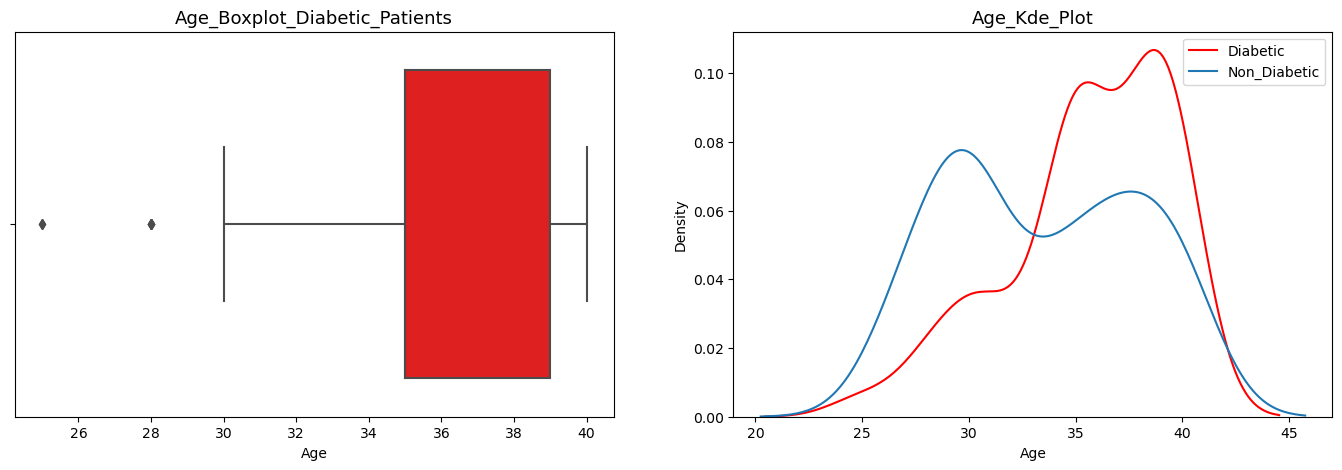

In [19]:
# Age Vs Class Box Plot and KDE Plot------------------ 
plt.figure(figsize=(17,5))
plt.subplot(1,2,1)
plt.title('Age_Boxplot_Diabetic_Patients',fontsize = 13)
sns.boxplot(x ='Age', data = new_df[new_df['Class'] == 1],color='r')
plt.subplot(1,2,2)
plt.title('Age_Kde_Plot',fontsize = 13)
sns.kdeplot(new_df[new_df['Class'] == 1].Age,label = 'Diabetic',color='r')
sns.kdeplot(new_df[new_df['Class'] == 0].Age,label = 'Non_Diabetic')
plt.legend()
plt.show()

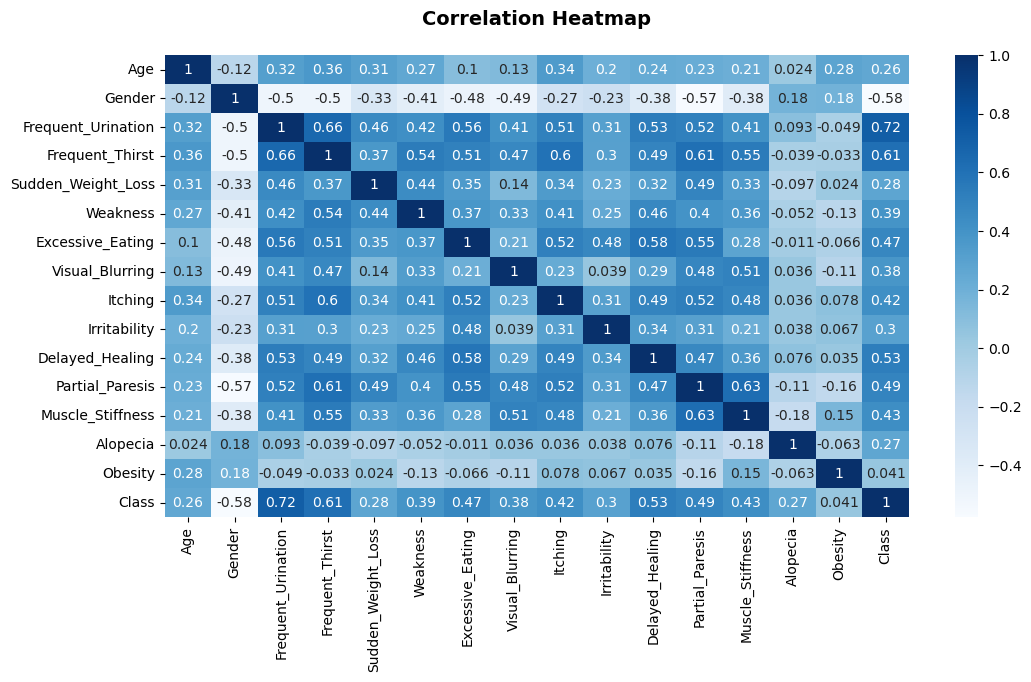

In [20]:
plt.figure(figsize=(12,6))
sns.heatmap(new_df.corr(),cmap="Blues", annot=True)
plt.title('Correlation Heatmap\n',fontweight='bold',fontsize=14)
plt.show()

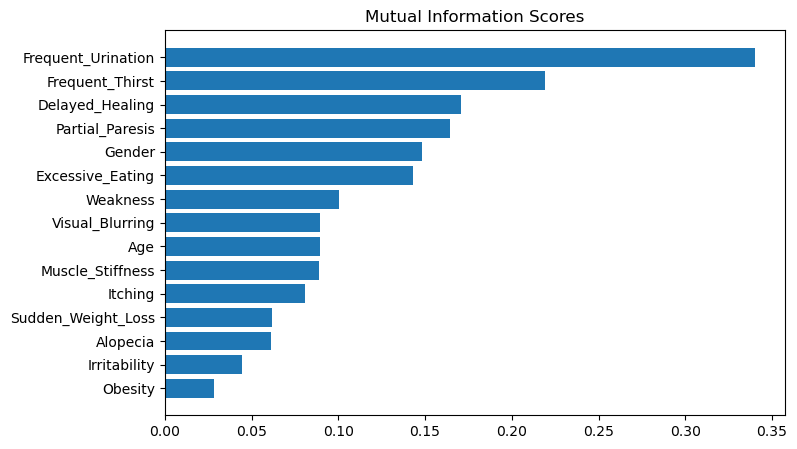

In [21]:
from sklearn.feature_selection import mutual_info_classif
X = new_df.copy()
y = X.pop('Class')

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    color = np.array(["C0"] * scores.shape[0])
    # Create plot
    plt.barh(width, scores, color=color)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    
def make_mi_scores(X, y):
    mi_scores = mutual_info_classif(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y)
mi_scores  # show a few features with their MI scores
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores.head(20))

In [22]:
X1 = new_df.iloc[:,0:-1]
y1 = new_df.iloc[:,-1]

In [23]:
X1.columns

Index(['Age', 'Gender', 'Frequent_Urination', 'Frequent_Thirst',
       'Sudden_Weight_Loss', 'Weakness', 'Excessive_Eating', 'Visual_Blurring',
       'Itching', 'Irritability', 'Delayed_Healing', 'Partial_Paresis',
       'Muscle_Stiffness', 'Alopecia', 'Obesity'],
      dtype='object')

In [24]:
#chi2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
best_feature = SelectKBest(score_func=chi2,k=10)
fit = best_feature.fit(X1,y1)

In [25]:
#mutual_info_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
best_feature = SelectKBest(mutual_info_regression,k=10)
fit = best_feature.fit(X1,y1)

In [26]:
dataset_scores = pd.DataFrame(fit.scores_)
dataset_cols = pd.DataFrame(X1.columns)

In [27]:
featurescores = pd.concat([dataset_cols,dataset_scores],axis=1)
featurescores.columns=['column','scores']

In [28]:
featurescores.sort_values('scores', ascending=False)

,column,scores
2,Frequent_Urination,0.312995
11,Partial_Paresis,0.195308
6,Excessive_Eating,0.192782
3,Frequent_Thirst,0.180155
10,Delayed_Healing,0.178370
1,Gender,0.163622
8,Itching,0.139568
7,Visual_Blurring,0.122176
4,Sudden_Weight_Loss,0.084043
12,Muscle_Stiffness,0.080799


In [29]:
featurescores.sort_values('scores', ascending=False)

,column,scores
2,Frequent_Urination,0.312995
11,Partial_Paresis,0.195308
6,Excessive_Eating,0.192782
3,Frequent_Thirst,0.180155
10,Delayed_Healing,0.178370
1,Gender,0.163622
8,Itching,0.139568
7,Visual_Blurring,0.122176
4,Sudden_Weight_Loss,0.084043
12,Muscle_Stiffness,0.080799


In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
trans_df = pd.DataFrame(scaler.fit_transform(new_df), columns = new_df.columns)
trans_df.head()

,Age,Gender,Frequent_Urination,Frequent_Thirst,Sudden_Weight_Loss,Weakness,Excessive_Eating,Visual_Blurring,Itching,Irritability,Delayed_Healing,Partial_Paresis,Muscle_Stiffness,Alopecia,Obesity,Class
0,1.257031,0.89202,-0.859990,1.221694,-0.778312,1.177164,-0.598100,-0.588875,1.508148,-0.439155,1.508148,-0.710285,1.646545,2.711088,2.970443,0.839096
1,0.780472,0.89202,1.162804,1.221694,-0.778312,-0.849500,1.671961,-0.588875,1.508148,-0.439155,1.508148,-0.710285,1.646545,-0.368856,-0.336650,0.839096
2,0.065634,0.89202,1.162804,-0.818535,-0.778312,-0.849500,1.671961,-0.588875,-0.663065,2.277100,1.508148,-0.710285,-0.607332,2.711088,-0.336650,0.839096
3,1.018751,0.89202,1.162804,-0.818535,1.284832,-0.849500,-0.598100,-0.588875,1.508148,2.277100,-0.663065,-0.710285,-0.607332,2.711088,-0.336650,0.839096
4,-0.649204,0.89202,-0.859990,-0.818535,-0.778312,-0.849500,-0.598100,-0.588875,-0.663065,2.277100,1.508148,-0.710285,-0.607332,-0.368856,2.970443,0.839096


In [31]:
print(featurescores.nlargest(10,'scores'))

                column    scores
2   Frequent_Urination  0.312995
11     Partial_Paresis  0.195308
6     Excessive_Eating  0.192782
3      Frequent_Thirst  0.180155
10     Delayed_Healing  0.178370
1               Gender  0.163622
8              Itching  0.139568
7      Visual_Blurring  0.122176
4   Sudden_Weight_Loss  0.084043
12    Muscle_Stiffness  0.080799


<AxesSubplot:>

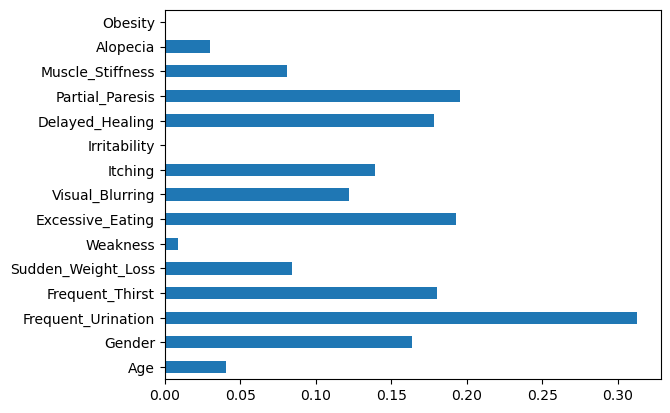

In [32]:
featureview=pd.Series(fit.scores_, index=X1.columns)
featureview.plot(kind='barh')

In [33]:
from sklearn.feature_selection import VarianceThreshold
feature_high_variance = VarianceThreshold(threshold=(0.5*(1-0.5)))
falls=feature_high_variance.fit(X1)

In [34]:
dataset_scores1 = pd.DataFrame(falls.variances_)
dat1 = pd.DataFrame(X1.columns)

In [35]:
high_variance = pd.concat([dataset_scores1,dat1],axis=1)
high_variance.columns=['variance','cols']

In [36]:
high_variance[high_variance['variance']>0.2]

,variance,cols
0,17.612751,Age
1,0.246764,Gender
2,0.244397,Frequent_Urination
3,0.240238,Frequent_Thirst
4,0.234931,Sudden_Weight_Loss
5,0.243465,Weakness
8,0.212127,Itching
10,0.212127,Delayed_Healing
11,0.222884,Partial_Paresis


In [37]:
x_var = new_df[['Age','Gender','Frequent_Urination','Frequent_Thirst','Weakness','Excessive_Eating','Visual_Blurring','Itching','Delayed_Healing','Partial_Paresis','Muscle_Stiffness']]

In [38]:
y_var = new_df['Class']

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_var,y_var,test_size = 0.2,random_state=1)

In [40]:
X_train.head()

,Age,Gender,Frequent_Urination,Frequent_Thirst,Weakness,Excessive_Eating,Visual_Blurring,Itching,Delayed_Healing,Partial_Paresis,Muscle_Stiffness
105,37,1,0,0,0,0,0,0,0,0,0
42,38,1,1,0,1,0,0,0,0,0,0
151,30,1,0,0,0,0,0,0,0,0,0
51,28,0,0,0,0,0,1,0,0,1,1
92,30,1,0,0,0,0,0,0,0,0,0


In [41]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

### Cross Validation

In [42]:
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Disable warnings
import warnings
warnings.filterwarnings("ignore")

In [43]:
models = {
    "                   Logistic Regression": LogisticRegression(),
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "   Support Vector Machine (RBF Kernel)": SVC(),
    "                        Neural Network": MLPClassifier(),
    "                         Random Forest": RandomForestClassifier(),
    "                     Gradient Boosting": GradientBoostingClassifier()    
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + "trained.")

                   Logistic Regressiontrained.
                   K-Nearest Neighborstrained.
                         Decision Treetrained.
Support Vector Machine (Linear Kernel)trained.
   Support Vector Machine (RBF Kernel)trained.
                        Neural Networktrained.
                         Random Foresttrained.
                     Gradient Boostingtrained.


In [44]:
# Evaluate the model
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=5)
    print(name, "average score: {:.2f} %".format(scores.mean() * 100))

                   Logistic Regression average score: 90.17 %
                   K-Nearest Neighbors average score: 84.93 %
                         Decision Tree average score: 97.69 %
Support Vector Machine (Linear Kernel) average score: 93.96 %
   Support Vector Machine (RBF Kernel) average score: 91.74 %
                        Neural Network average score: 95.47 %
                         Random Forest average score: 97.72 %
                     Gradient Boosting average score: 96.95 %


In [45]:
# Predict on test set
for name, model in models.items():
    print(name + "score on test set: {:.2f} %".format(model.score(X_test, y_test) * 100))

                   Logistic Regressionscore on test set: 94.12 %
                   K-Nearest Neighborsscore on test set: 94.12 %
                         Decision Treescore on test set: 94.12 %
Support Vector Machine (Linear Kernel)score on test set: 97.06 %
   Support Vector Machine (RBF Kernel)score on test set: 97.06 %
                        Neural Networkscore on test set: 97.06 %
                         Random Forestscore on test set: 94.12 %
                     Gradient Boostingscore on test set: 94.12 %


### Logistic Reg

In [46]:
#logistic regression
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

In [47]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=lg, X=X_train ,y=y_train,cv=10)
print("accuracy = {:.2f} %".format(accuracies.mean()*100))
print("std = {:.2f} %".format(accuracies.std()*100))

accuracy = 90.99 %
std = 8.23 %


In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix
pre=lg.predict(X_test)
logistic_regression=accuracy_score(pre,y_test)
print(accuracy_score(pre,y_test))
print(confusion_matrix(pre,y_test))

0.9411764705882353
[[12  1]
 [ 1 20]]


In [49]:
from sklearn.metrics import classification_report
print(classification_report(pre,y_test))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.95      0.95      0.95        21

    accuracy                           0.94        34
   macro avg       0.94      0.94      0.94        34
weighted avg       0.94      0.94      0.94        34



### SVM - rbf

In [50]:
from sklearn.svm import SVC
sv=SVC(kernel='rbf',random_state=0)
sv.fit(X_train,y_train)

SVC(random_state=0)

In [51]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=sv, X=X_train ,y=y_train,cv=10)
print("accuracy is {:.2f} %".format(accuracies.mean()*100))
print("std is {:.2f} %".format(accuracies.std()*100))

accuracy is 88.74 %
std is 9.74 %


In [52]:
pre1=sv.predict(X_test)
svm_linear=accuracy_score(pre1,y_test)
print(accuracy_score(pre1,y_test))
print(confusion_matrix(pre1,y_test))

0.9705882352941176
[[12  0]
 [ 1 21]]


In [53]:
from sklearn.metrics import classification_report
print(classification_report(pre1,y_test))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.95      0.98        22

    accuracy                           0.97        34
   macro avg       0.96      0.98      0.97        34
weighted avg       0.97      0.97      0.97        34



### KNN

In [54]:
#K-Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier
score=[]

for i in range(1,10):
    
    
    knn=KNeighborsClassifier(n_neighbors=i,metric='minkowski',p=2)
    knn.fit(X_train,y_train)
    pre3=knn.predict(X_test)
    ans=accuracy_score(pre3,y_test)
    score.append(round(100*ans,2))
print(sorted(score,reverse=True)[:5])
knn=sorted(score,reverse=True)[:1]

[100.0, 100.0, 100.0, 94.12, 94.12]


### Decision Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier(criterion='gini')
dc.fit(X_train,y_train)

DecisionTreeClassifier()

In [56]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=dc, X=X_train ,y=y_train,cv=10)
print("accuracy is {:.2f} %".format(accuracies.mean()*100))
print("std is {:.2f} %".format(accuracies.std()*100))

accuracy is 96.21 %
std is 5.12 %


In [57]:
pre5=dc.predict(X_test)
Decisiontress_classifier=accuracy_score(pre5,y_test)
print(accuracy_score(pre5,y_test))
print(confusion_matrix(pre5,y_test))

0.9705882352941176
[[13  1]
 [ 0 20]]


In [58]:
from sklearn.metrics import classification_report
print(classification_report(pre5,y_test))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.95      1.00      0.98        20

    accuracy                           0.97        34
   macro avg       0.98      0.96      0.97        34
weighted avg       0.97      0.97      0.97        34



### Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier
estime=[]
for i in range(1,100):
    rc=RandomForestClassifier(n_estimators=i,criterion='entropy',random_state=0)
    rc.fit(X_train,y_train)

In [60]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=rc, X=X_train ,y=y_train,cv=10)
print("accuracy is {:.2f} %".format(accuracies.mean()*100))
print("std is {:.2f} %".format(accuracies.std()*100))

accuracy is 97.69 %
std is 3.53 %


In [61]:
pre6 = rc.predict(X_test)
Random_forest=accuracy_score(pre6,y_test)
print(accuracy_score(pre6,y_test))
print(confusion_matrix(pre6,y_test))

0.9411764705882353
[[12  1]
 [ 1 20]]


## Converting binary to percentage

In [65]:
import numpy as np

# assuming your binary predictions are stored in y_pred

# apply sigmoid function to convert binary predictions to probabilities
prob_pred = 1 / (1 + np.exp(-pre6))


In [66]:
# convert predicted probabilities to percentages
pct_pred = prob_pred * 100

### Second method using softmax

In [75]:
from keras.models import Sequential
from keras.layers import Dense

# assuming X_train and y_train are your training data and labels
n_features = X_train.shape[1]
n_classes = 2  # 0 or 1 for not having/having diabetes

# define your model with softmax activation
model = Sequential()
model.add(Dense(32, input_dim=n_features, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

# compile your model with appropriate loss and metrics
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# convert your binary labels to categorical labels for softmax
from keras.utils import to_categorical
y_train_cat = to_categorical(y_train)

# train your model
model.fit(X_train, y_train_cat, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
4/4 [==============================] - 1s 77ms/step - loss: 0.5462 - accuracy: 0.7925 - val_loss: 0.3731 - val_accuracy: 0.9630
Epoch 2/10
4/4 [==============================] - 0s 12ms/step - loss: 0.5151 - accuracy: 0.8491 - val_loss: 0.3528 - val_accuracy: 0.9630
Epoch 3/10
4/4 [==============================] - 0s 13ms/step - loss: 0.4880 - accuracy: 0.8679 - val_loss: 0.3372 - val_accuracy: 0.9259
Epoch 4/10
4/4 [==============================] - 0s 14ms/step - loss: 0.4646 - accuracy: 0.8774 - val_loss: 0.3231 - val_accuracy: 0.9259
Epoch 5/10
4/4 [==============================] - 0s 13ms/step - loss: 0.4464 - accuracy: 0.8396 - val_loss: 0.3110 - val_accuracy: 0.9259
Epoch 6/10
4/4 [==============================] - 0s 12ms/step - loss: 0.4282 - accuracy: 0.8302 - val_loss: 0.3012 - val_accuracy: 0.9259
Epoch 7/10
4/4 [==============================] - 0s 12ms/step - loss: 0.4140 - accuracy: 0.8302 - val_loss: 0.2927 - val_accuracy: 0.9259
Epoch 8/10
4/4 [===========

In [76]:
# assuming X_test is your test data
y_prob = model.predict(X_test)

2/2 [==============================] - 0s 530us/step


In [77]:
y_pred_pct = y_prob * 100

In [86]:
y_pred_pct

array([[23.52348  , 76.47652  ],
       [34.63326  , 65.36674  ],
       [58.091217 , 41.90878  ],
       [72.00129  , 27.998713 ],
       [ 1.4764647, 98.52354  ],
       [ 4.472131 , 95.52787  ],
       [68.60558  , 31.394417 ],
       [ 0.9426075, 99.057396 ],
       [68.21971  , 31.780285 ],
       [ 1.1586336, 98.84136  ],
       [77.6415   , 22.358503 ],
       [ 5.4380403, 94.561966 ],
       [70.74191  , 29.258087 ],
       [35.129665 , 64.87034  ],
       [82.10132  , 17.898693 ],
       [ 1.4764647, 98.52354  ],
       [65.17408  , 34.825916 ],
       [45.138706 , 54.861294 ],
       [ 1.4764647, 98.52354  ],
       [ 1.4833593, 98.51664  ],
       [82.10132  , 17.898693 ],
       [ 3.0604365, 96.93956  ],
       [32.451286 , 67.54871  ],
       [68.21971  , 31.780285 ],
       [32.27338  , 67.726616 ],
       [48.811764 , 51.188236 ],
       [42.05759  , 57.942413 ],
       [45.138706 , 54.861294 ],
       [68.21971  , 31.780285 ],
       [27.112303 , 72.8877   ],
       [ 1

In [90]:
import numpy as np

# Assuming y_pred_pct is the array of predicted percentages
classes = [0, 1]
y_pred_labels = np.argmax(y_pred_pct, axis=1)
y_pred_pct_max = np.max(y_pred_pct, axis=1)

# Loop over the instances and print the predicted class label and its percentage value
for i in range(len(y_pred_labels)):
    pred_class = classes[y_pred_labels[i]]
    pred_pct = y_pred_pct_max[i]
    print(f"class = {pred_class},    percentage = {pred_pct}")


class = 1,    percentage = 76.47651672363281
class = 1,    percentage = 65.36673736572266
class = 0,    percentage = 58.091217041015625
class = 0,    percentage = 72.00128936767578
class = 1,    percentage = 98.5235366821289
class = 1,    percentage = 95.52787017822266
class = 0,    percentage = 68.60558319091797
class = 1,    percentage = 99.0573959350586
class = 0,    percentage = 68.21971130371094
class = 1,    percentage = 98.84136199951172
class = 0,    percentage = 77.6415023803711
class = 1,    percentage = 94.56196594238281
class = 0,    percentage = 70.74191284179688
class = 1,    percentage = 64.8703384399414
class = 0,    percentage = 82.101318359375
class = 1,    percentage = 98.5235366821289
class = 0,    percentage = 65.17407989501953
class = 1,    percentage = 54.86129379272461
class = 1,    percentage = 98.5235366821289
class = 1,    percentage = 98.51663970947266
class = 0,    percentage = 82.101318359375
class = 1,    percentage = 96.93955993652344
class = 1,    perce

## Testing user input

In [79]:
user_inp = np.array([39, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0])
user_inp = user_inp.reshape(1, -1)

# apply the scaler on the input array
user_inp_scaled = ss.transform(user_inp)

print(user_inp_scaled)

[[ 1.09468539  0.87939373 -0.83971912 -0.78863884  1.24807544 -0.56287804
  -0.53968707 -0.66757185 -0.63245553 -0.66757185 -0.56287804]]


In [82]:
model.predict(user_inp_scaled)* 100

1/1 [==============================] - 0s 27ms/step


array([[65.17408 , 34.825916]], dtype=float32)